## Definição do problema

Comecei a trabalha em uma empresa de comércio eletrônico, como um cientista de dados, na cidade de Nova York. A empresa vende roupas onlines e também fornece serviços de consultoria em estilo e vestuário.
Clientes procuram na loja sessões/reuniões com um estilista pessoal e podem decidir encomendar roupas que eles desejam usando um aplicativo móvel ou um site.


A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Não existe recurso para os investimentos, você foi contratado para ajudá-los a descobrir isso!Como resolver a questão?
___

### Descrição da base de dados:

A empresa me forneceu um arquivo com seus dados:

Arquivo: https://www.kaggle.com/srolka/ecommerce-customers
- Informações pessoais do cliente:
    * Nome
    * Email
    * Avatar
- Informações sobre a interação do cliente com a loja 
    * Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
    * Time on App: Tempo médio gasto no app em minutos.
    * Time on Website: Tempo médio gasto no site em minutos.
    * Lenght of Membership: Há quantos anos o cliente é membro.
    * Yearly Amount Spent: Valor gasto pelo cliente anualmente
    ___

### Abordagem da solução do problema

A dor principal da empresa é descobrir onde colocar seus esforços para obter o melhor resultado. Aqui, considerarei que o valor anual gasto por cliente pode ser um bom indicador de sucesso para o problema. Ou seja, estamos interessados em aumentar o máximo que pudermos os gastos anual por cliente. E se descobrimos se o cliente gasta mais quando passa mais tempo no App ou no site a cada ano, podemos decidir para qual plataforma direcionar os esforços, visando maximizar as entradas. Portanto, assumirei a variável "Yearly Amount Spent" como a variável de interesse. Minha abordagem será então ajustar modelos de regressão linear para investigar o valor dos coeficientes angulares das variáveis preditoras "Time on Website" e "Time on App" sobre a variável resposta "Yearly Amount Spent". Em outras palavras, descobrir qual dessas variáveis possui maior efeito sobre a variável de interesse.

Além disso, sempre podemos descobrir outras relações interessantes entre o gasto anual dos clientes e as demais variáveis do conjunto de dados a exploração e a análise, gerando novos insights para o negócio!

---

### Etapas do trabalho

- Coleta de dados
- Análise de dados
- Criação de modelos
- Validação de modelos
- Conclusão (apresentação dos resultados)

____

In [137]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

---

### 1.Ingestão de dados

In [106]:
# Dados
columns = ['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']
customers_data = pd.read_csv("Ecommerce Customers.csv", usecols=columns)

In [107]:
customers_data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [108]:
# Tamanho da base de dados
print(f'{len(customers_data)} rowns, {customers_data.shape[1]} columns')

500 rowns, 5 columns


In [109]:
# Dados faltantes
customers_data.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

____

### 2.Análise Exploratória de Dados

In [ ]:
report = ProfileReport(customers_data,title="Customers Report")
report.to_file("report_ecommerce.html")

In [111]:
report

Investigando melhor a correlação entre as variáveis:

In [112]:
corr_table = customers_data.corr()
corr_table

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

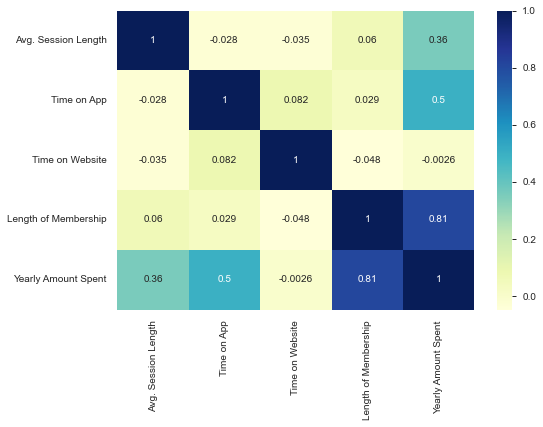

In [113]:
sns.heatmap(corr_table, annot=True, cmap="YlGnBu")

Mais exploração das correlações: plotando gráficos da reta de regressão

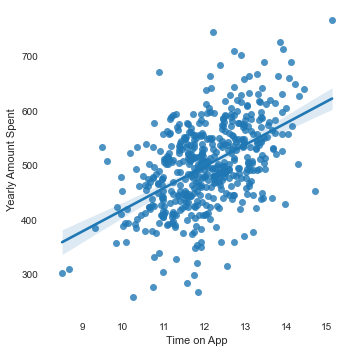

In [114]:
sns.lmplot(x="Time on App", y="Yearly Amount Spent", data=customers_data)

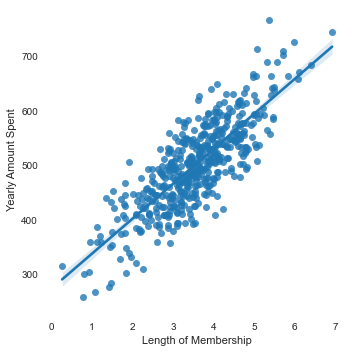

In [115]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customers_data)

#### 2.1. Insights da AED

* Fraca correlação entre tempo no site e gasto anual por cliente (<0.01)
* Correlação interessante (0.5) entre tempo no App e gasto anual por cliente
* Correlação forte entre tempo que o cliente é membro e gasto anual (0.81)

___

### 3.Construção dos modelos lineares

Separando variáveis preditoras e resposta:

In [116]:

y_customers = customers_data.loc[:,"Yearly Amount Spent"].values
X_customers = customers_data.drop(["Yearly Amount Spent"], axis=1).values

Separando bases de treino e teste:

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((350, 4), (350,), (150, 4), (150,))

Instanciando e treinando o modelo de regressão linear:

In [119]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Inspecionando os coeficientes de determinação da equação da reta:

In [120]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [121]:
lm.intercept_

-1050.6536746645716

**Validação do modelo de regressão:** para sabermos se estamos indo por um caminho confiável e de que nosso modelo de fato consegue captar as variações da nossa base de dados e permite fazer inferências seguras, precisamos validá-lo. Para isso vamos usar a base de teste. Como já conhecemos os valores de y teste, podemos pedir para o modelo prever esses valores e então calcular as métricas de erro (diferenças entre os valores de y observado e predito pelo modelo treinado):

In [122]:
y_predict = lm.predict(X_test)

Diagrama de dispersão dos valores reais de teste em relação aos valores preditos.

Text(0, 0.5, 'ỹ predito')

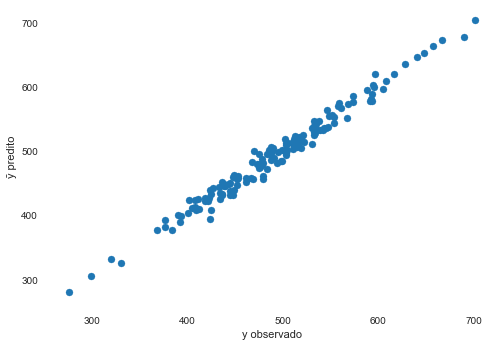

In [125]:
plt.scatter(y_test, y_predict)
plt.xlabel('y observado')
plt.ylabel('ỹ predito')

Principais métricas de erro:

In [127]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R:', metrics.r2_score(y_test,y_predict))

MAE: 8.4260916414321
MSE: 103.91554136503314
RMSE: 10.193897260863146
R: 0.9808757641125856


In [128]:
# R2 ajustado:
def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r


In [129]:
print('R-adjust:', adjusted_R(y_test, y_predict, X_train.shape[1]))

R-adjust: 0.980348198984657


Testando a normalidade dos resíduos:

In [133]:
# Distribuição dos erros:
absolute_error_list = y_test - y_predict
absolute_error_list[:5]

array([-2.63679547, -7.80037479, -8.46317449,  1.9537748 , -0.05182453])

<AxesSubplot:ylabel='Count'>

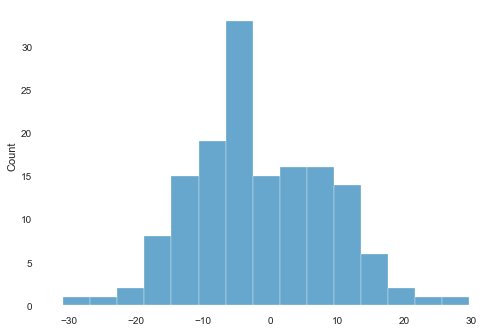

In [135]:
sns.histplot(absolute_error_list, bins=15)

In [149]:
# teste estatístico: se p > 0.05, os resíduos têm distribuição normal
shapiro_test = shapiro(absolute_error_list)
shapiro_test.pvalue

0.41564232110977173

___

### 4.Conclusões

O modelo linear resolveu o meu problema?
Retomando, o problema era identificar qual é a melhor estratégia de esforço da empresa: investir no App ou no site. Para isso nos propusemos a entender qual é a relação entre o do tempo de uso dessas duas plataformas sobre o total de gastos anual do cliente. Vamos consolidar os coeficientes de variação em uma tabela, para visualizar melhor a resposta:

In [147]:
X_name = customers_data.columns[:-1]
coef = pd.DataFrame(lm.coef_, X_name, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


Podemos tirar as seguintes conclusões da nossa análise:

* O atributo que tem relação mais forte e positiva com o valor de gasto mensal do cliente é o tempo que ele é membro na plataforma. Quanto mais tempo, maior o gasto anual. Portanto, a empresa deveria pensar em estratégias para reter os seus membros (estratégias de fidelização), sobretudo aqueles mais antigos. Esse é um insight adicional que tiramos da análise e que não fazia parte do escopo do problema inicial. 
* Entre investir no site ou no App, a empresa deve optar pela segunda plataforma. Segundo o modelo, para cada novo minuto que o cliente passa no App ele gasta 38 dólares, enquanto que para cada minuto no site gasta apenas 0.46 dólares.